In [2]:
import pandas as pd
import numpy as np

In [3]:
col= ["target","ids","date","flag","user","text"]
ENCODE = "ISO-8859-1"
df = pd.read_csv("C:/Users/Dell/Documents/Major Project/training.1600000.processed.noemoticon.csv",encoding=ENCODE,names=col,header=None ) 
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df['target'].unique().tolist()

[0, 4]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
!pip install wordcloud
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

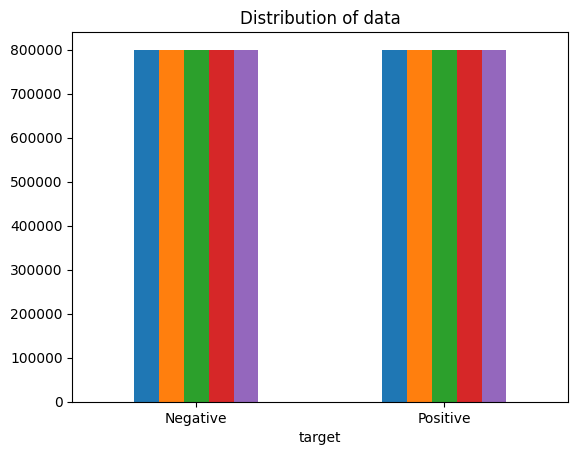

In [7]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
text,sentiment = list(df['text']), list(df['target'])

<AxesSubplot: xlabel='target', ylabel='count'>

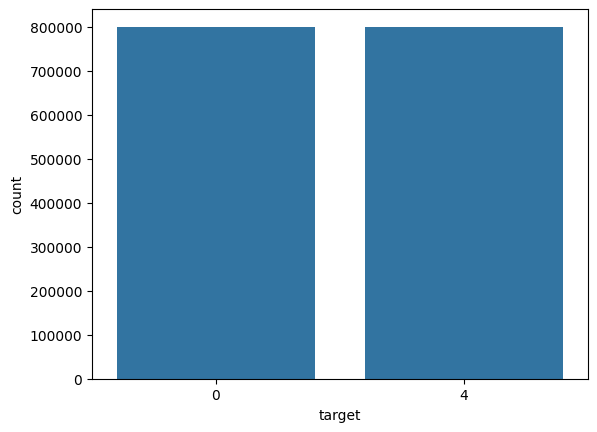

In [8]:
sns.countplot(x='target', data=df)

In [9]:
#Data cleaning

In [10]:
data = df[['text','target']]
data['target'] = data['target'].replace(4,1)
data['target'].unique()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1244\44870659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


array([0, 1], dtype=int64)

In [11]:
#seprating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [12]:
#Taking less value for calculation purposes
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
data_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 800000 to 819999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   target  20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


In [13]:
dataset = pd.concat([data_pos, data_neg])
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [15]:
STOPWORDS = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()

19995    much time weekend, work trip malmï¿½ fri-sat t...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

In [16]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

In [17]:
#cleaning and removing repeating characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

In [18]:
#cleaning URL's
def cleaning_URLs(data):
    return re.sub('((www.[^s]+) |(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()


19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()


19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

In [20]:
def tokenization(text):
    text = re.split('\W+', text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: tokenization(x.lower()))
dataset['text'].tail()


19995    [much, time, weekend, work, trip, malmï, ½, fr...
19996                                 [one, day, holidays]
19997                [feeling, right, hate, damn, humprey]
19998    [geezi, hv, read, whole, book, personality, ty...
19999    [threw, sign, donnie, bent, get, thingee, made...
Name: text, dtype: object

In [21]:
#stemming 
import nltk
st = nltk.PorterStemmer()
def stemming_ontext(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: stemming_ontext(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [22]:
#DATA VISUALIZATION

In [23]:
X = data.text
Y = data.target

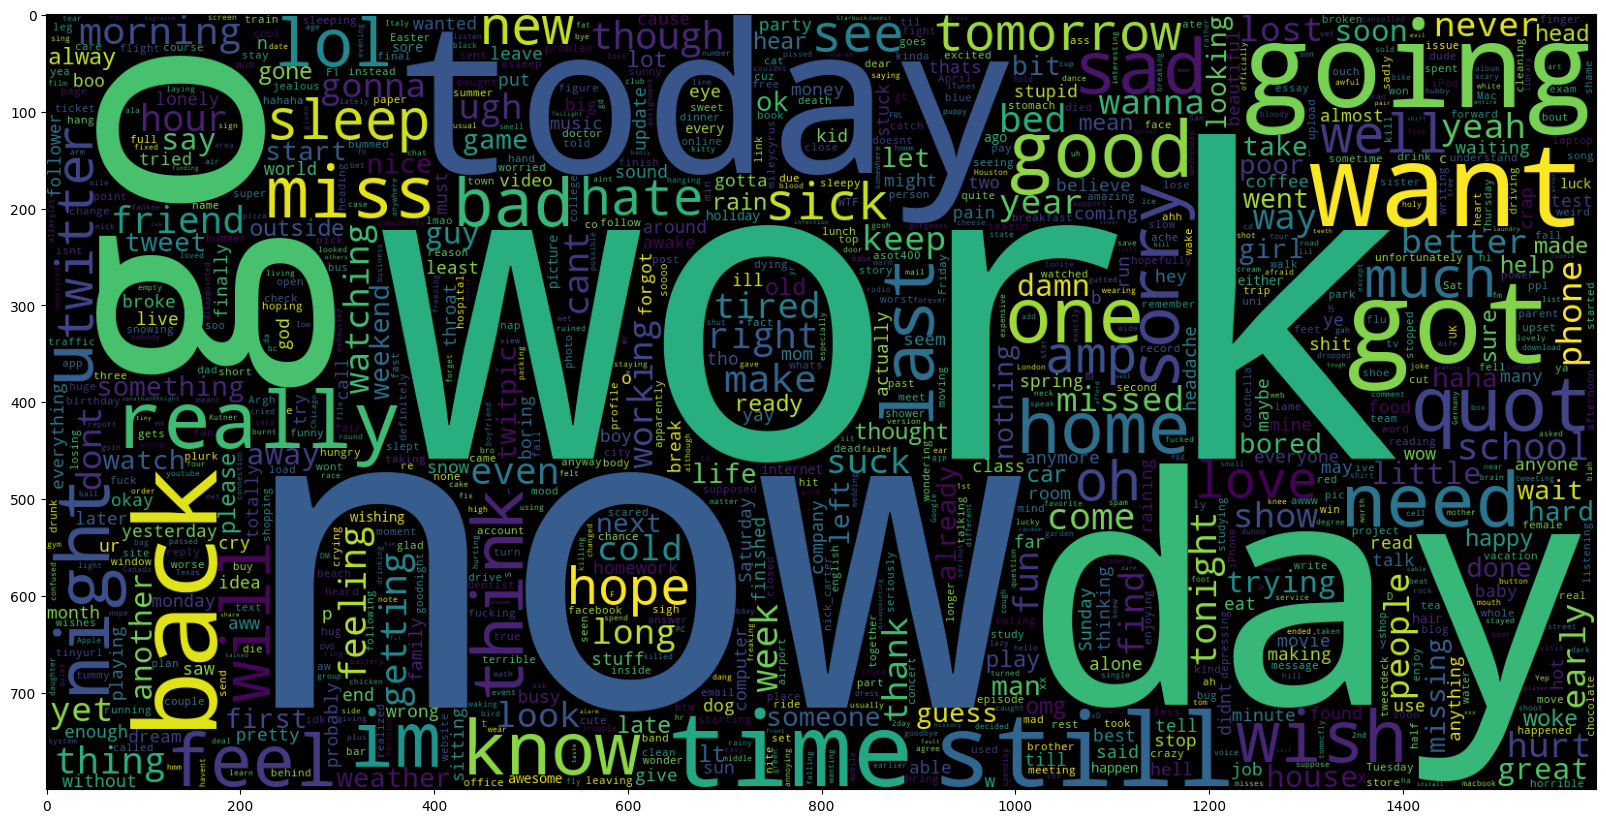

In [24]:
data_neg = data['text'][:20000]
wc = WordCloud(max_words = 1000,width = 1600, height = 800, collocations = False ).generate(" ".join(data_neg))
plt.figure(figsize = (20,20))
plt.imshow(wc)

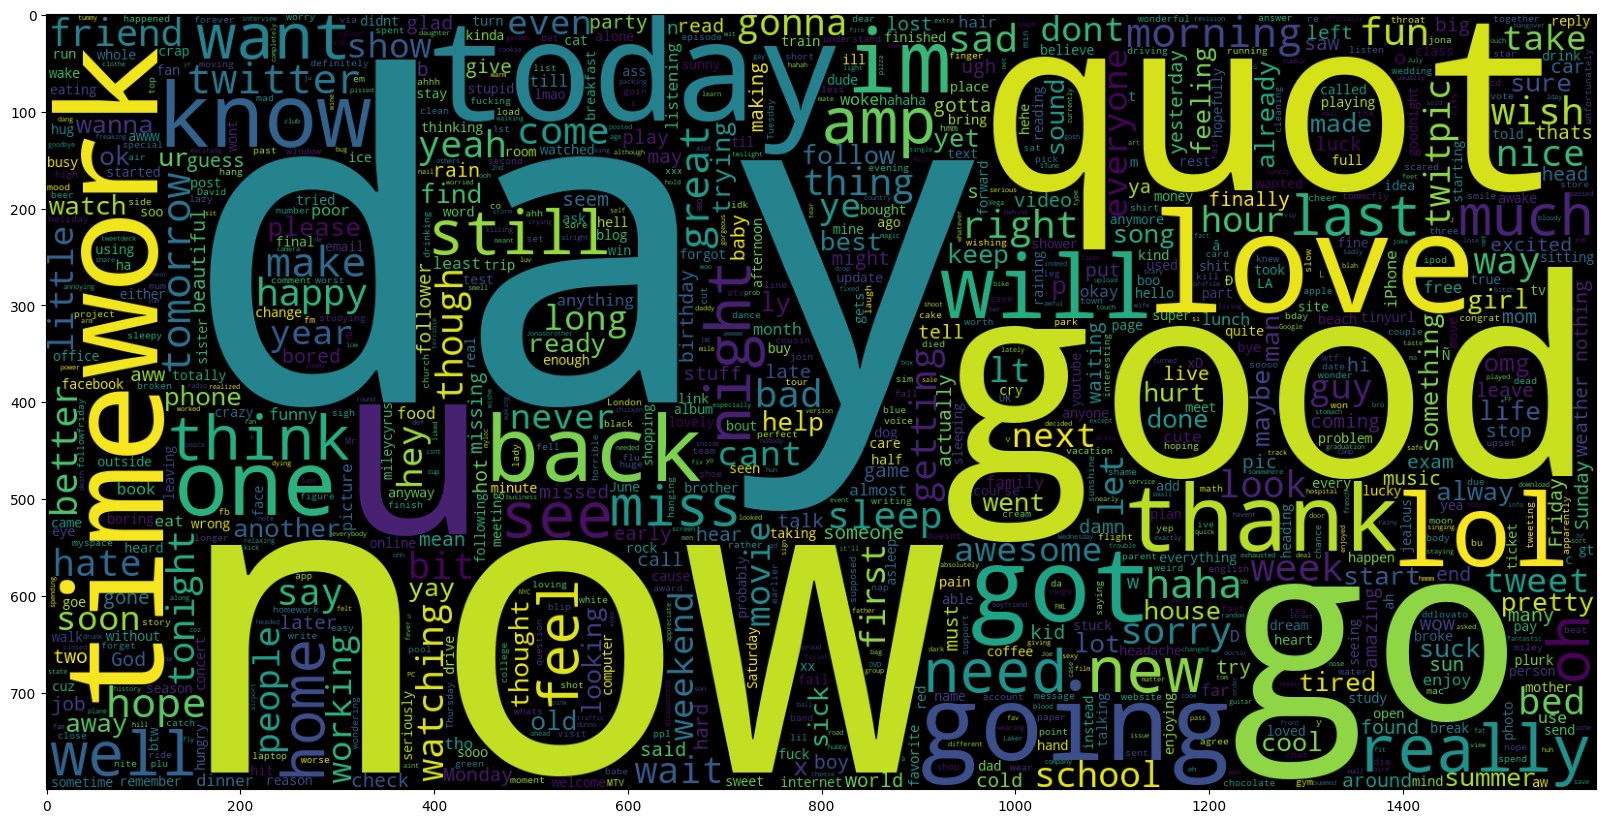

In [25]:
data_pos = data['text'][20000:]
wc = WordCloud(max_words = 1000,width = 1600, height = 800, collocations = False ).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [26]:
data_neg.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [27]:
# Building TEsting and Training Data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, precision_score,accuracy_score

In [29]:
#separating the 80% data from training data and 20% for testing data
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size= 0.20, random_state = 26105111)

In [30]:
#Training the model
vectoriser = TfidfVectorizer(ngram_range =(1,2) ,max_features = 1000)
vectoriser.fit(X_train)
print('No of feature_words: ', len(vectoriser.get_feature_names_out()))

No of feature_words:  1000


In [31]:
X_train = vectoriser.transform(X_train)
X_test= vectoriser.transform(X_test)

In [32]:
# Model Evalution

In [33]:
def model_Evaluate(model):
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    #Compute and plot the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories= ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '')
    plt.xlabel("Predicted values", fontdict = {'size':14})
    plt.xlabel("Actual values", fontdict = {'size':14})
    plt.title("Confusion Matrix", fontdict = {'size':18})

In [34]:
#NAIVE BAYES

              precision    recall  f1-score   support

           0       0.74      0.72      0.73    159838
           1       0.73      0.75      0.74    160162

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000

0.731117713950332


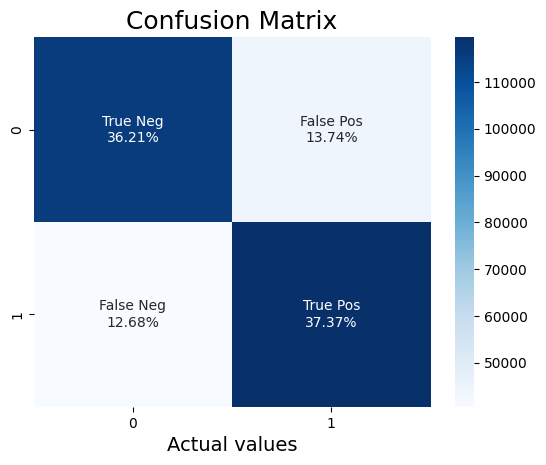

In [48]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
MNB = MultinomialNB()
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)
model_Evaluate(BNBmodel)
print(precision_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74    159838
           1       0.75      0.71      0.73    160162

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000

0.7519931248760494


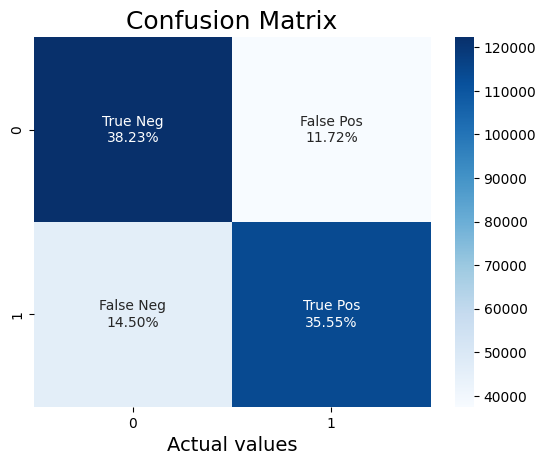

In [49]:
MNB.fit(X_train, y_train)
y_pred2 = MNB.predict(X_test)
model_Evaluate(MNB)
print(precision_score(y_test,y_pred2))

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [38]:
dtc = DecisionTreeClassifier(max_depth=10)
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=20,random_state = 2)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76    159838
           1       0.75      0.77      0.76    160162

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

0.7519919956339822


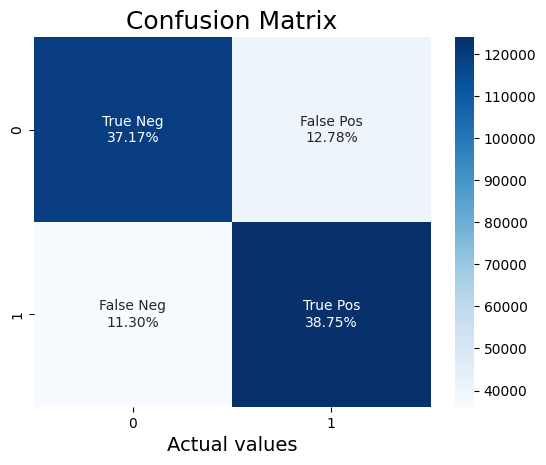

In [39]:
lr.fit(X_train, y_train)
y_pred9 = lr.predict(X_test)
model_Evaluate(lr)
print(precision_score(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.56      0.90      0.69    159838
           1       0.75      0.30      0.43    160162

    accuracy                           0.60    320000
   macro avg       0.65      0.60      0.56    320000
weighted avg       0.65      0.60      0.56    320000

0.7471110210065032


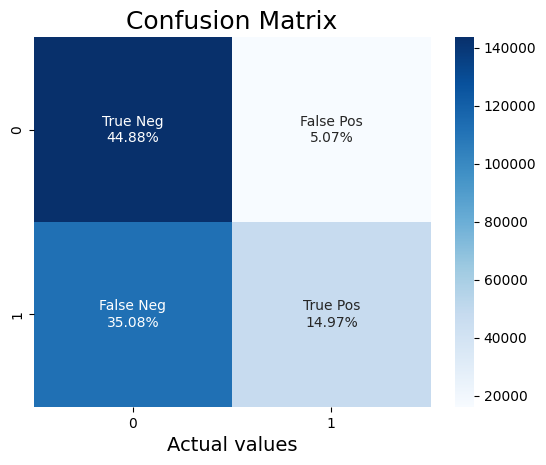

In [41]:
dtc.fit(X_train, y_train)
y_pred4 = dtc.predict(X_test)
model_Evaluate(dtc)
print(precision_score(y_test,y_pred4))

In [ ]:
# rf.fit(X_train, y_train)
# y_pred6 = rf.predict(X_test)
# model_Evaluate(rf)
# print(precision_score(y_test,y_pred6))


In [47]:
new_tweet = "good"
pr_1 = cleaning_stopwords(new_tweet)
pr_2 = cleaning_punctuations(pr_1)
pr_3 = cleaning_repeating_char(pr_2)
pr_4 = cleaning_URLs(pr_3)
pr_5 = cleaning_numbers(pr_4)
pr_6 = tokenization(pr_5)
pr_7 = stemming_ontext(pr_6)

new_vector = vectoriser.transform(pr_7)
predicted_label = lr.predict(new_vector)
print(predicted_label)

[1]
